## Preparing the data from SmartParking Dataset
### Dataset URL: https://www.kaggle.com/mypapit/klccparking/data

#### This dataset consists in 3 columns: the park name, the occupation rate and the verification time.
#### In a timeseries analysis, to predict the future occupation rate of the parking, we need to prepare this dataset and make it more clear and regular as possible.

#### The timeseries column was made by a sensor in the regular period of 15 minutes.

#### Following this steps, we built a prepared dataset, without invalid values and ready to work with AI algorithms of forecasting.


In [1]:
import pandas as pd
import numpy as np

#### The first step is read the original dateset in a pandas dataframe.

In [2]:
header_list = ["park_name", "spots_available","verification_datetime"]
raw_data = pd.read_csv('../datasets/original/parking-klcc-2016-2017.txt', names=header_list, sep=';', engine='python')

raw_data.head(16)

,park_name,spots_available,verification_datetime
0,KLCC,1642,2016-06-01 10:12:37
1,KLCC,1609,2016-06-01 10:15:05
2,KLCC,1458,2016-06-01 10:30:05
3,KLCC,1357,2016-06-01 10:45:04
4,KLCC,1235,2016-06-01 11:00:06
5,KLCC,1076,2016-06-01 11:15:04
6,KLCC,0944,2016-06-01 11:30:05
7,KLCC,0791,2016-06-01 11:45:04
8,KLCC,0637,2016-06-01 12:00:05
9,KLCC,0529,2016-06-01 12:15:05


In [3]:
#### Preparing the data by filtering dataset to the most important columns:
#### 1. Timeseries: verification_datetime (15min period timeseries)
#### 2. Target Forecasting: spots_available (for parking occupation)

#### The park_name is the same for all dataset, so we can remove it to decrease the dataset complexity and size.

In [4]:
raw_data = raw_data.drop("park_name", axis=1)

raw_data.head(16)

,spots_available,verification_datetime
0,1642,2016-06-01 10:12:37
1,1609,2016-06-01 10:15:05
2,1458,2016-06-01 10:30:05
3,1357,2016-06-01 10:45:04
4,1235,2016-06-01 11:00:06
5,1076,2016-06-01 11:15:04
6,0944,2016-06-01 11:30:05
7,0791,2016-06-01 11:45:04
8,0637,2016-06-01 12:00:05
9,0529,2016-06-01 12:15:05


#### Set the Timeseries as the Index of the dataframe.

In [5]:
raw_data = raw_data.set_index("verification_datetime")

raw_data.head(16)

,spots_available
verification_datetime,
2016-06-01 10:12:37,1642
2016-06-01 10:15:05,1609
2016-06-01 10:30:05,1458
2016-06-01 10:45:04,1357
2016-06-01 11:00:06,1235
2016-06-01 11:15:04,1076
2016-06-01 11:30:05,0944
2016-06-01 11:45:04,0791
2016-06-01 12:00:05,0637


#### Now we need to apply some patterns to the spots_available values.
#### The dataset "spots_available" have two important values as text: "OPEN" and "FULL".
#### OPEN is the value set when the sensor can't connect to the system and retrieve a null value.
#### FULL is the value set when the parking it's full.

#### To get more precision in the algorithms, we will set all OPEN values to NA, and then, we will remove all this values.
#### In the other hand, for the FULL values, we will set it all to 0, because it's the number of "spots_available".

In [6]:
# Set Full to 0
new_data = raw_data.replace({'spots_available': 'FULL'}, 0)

# Set Open to NaN
new_data = new_data.replace({'spots_available': 'OPEN'}, np.nan)

# Remove Open (NA Values)
new_data = new_data.dropna()

# Print new dataframe
new_data.head(16)

,spots_available
verification_datetime,
2016-06-01 10:12:37,1642
2016-06-01 10:15:05,1609
2016-06-01 10:30:05,1458
2016-06-01 10:45:04,1357
2016-06-01 11:00:06,1235
2016-06-01 11:15:04,1076
2016-06-01 11:30:05,0944
2016-06-01 11:45:04,0791
2016-06-01 12:00:05,0637


#### Now we need to set the "spots_available" as a number only column and set the "verification_datetime" as a datetime column.

In [7]:
# Transform the spots_available to numeric column
new_data['spots_available'] = pd.to_numeric(new_data['spots_available'])

# Transform the verification_datetime to datetime column
new_data.index = pd.to_datetime(new_data.index)

# Print new dataframe
new_data.head(16)

,spots_available
verification_datetime,
2016-06-01 10:12:37,1642
2016-06-01 10:15:05,1609
2016-06-01 10:30:05,1458
2016-06-01 10:45:04,1357
2016-06-01 11:00:06,1235
2016-06-01 11:15:04,1076
2016-06-01 11:30:05,944
2016-06-01 11:45:04,791
2016-06-01 12:00:05,637


#### To make data more and more regular, we remove all the datetime with "broken" minutes, outside the pattern of 15 minutes range (00-15-30-45).
#### In addition, we can set all seconds to zero (because it's a period of minutes, and seconds don't matter).

In [8]:
new_data = new_data[(new_data.index.minute == 0) | (new_data.index.minute == 15) |
            (new_data.index.minute == 30) | (new_data.index.minute == 45) ]

new_data.index = new_data.index.map(lambda x: x.replace(second=0))

new_data.head(16)

,spots_available
verification_datetime,
2016-06-01 10:15:00,1609
2016-06-01 10:30:00,1458
2016-06-01 10:45:00,1357
2016-06-01 11:00:00,1235
2016-06-01 11:15:00,1076
2016-06-01 11:30:00,944
2016-06-01 11:45:00,791
2016-06-01 12:00:00,637
2016-06-01 12:15:00,529


### Data Visualization
#### Now, we can check the prepared dataframe in a timeseries graph to analyze the parking variation by time

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,10

#### Running this plot, we can view all the prepared dataset in a graph.

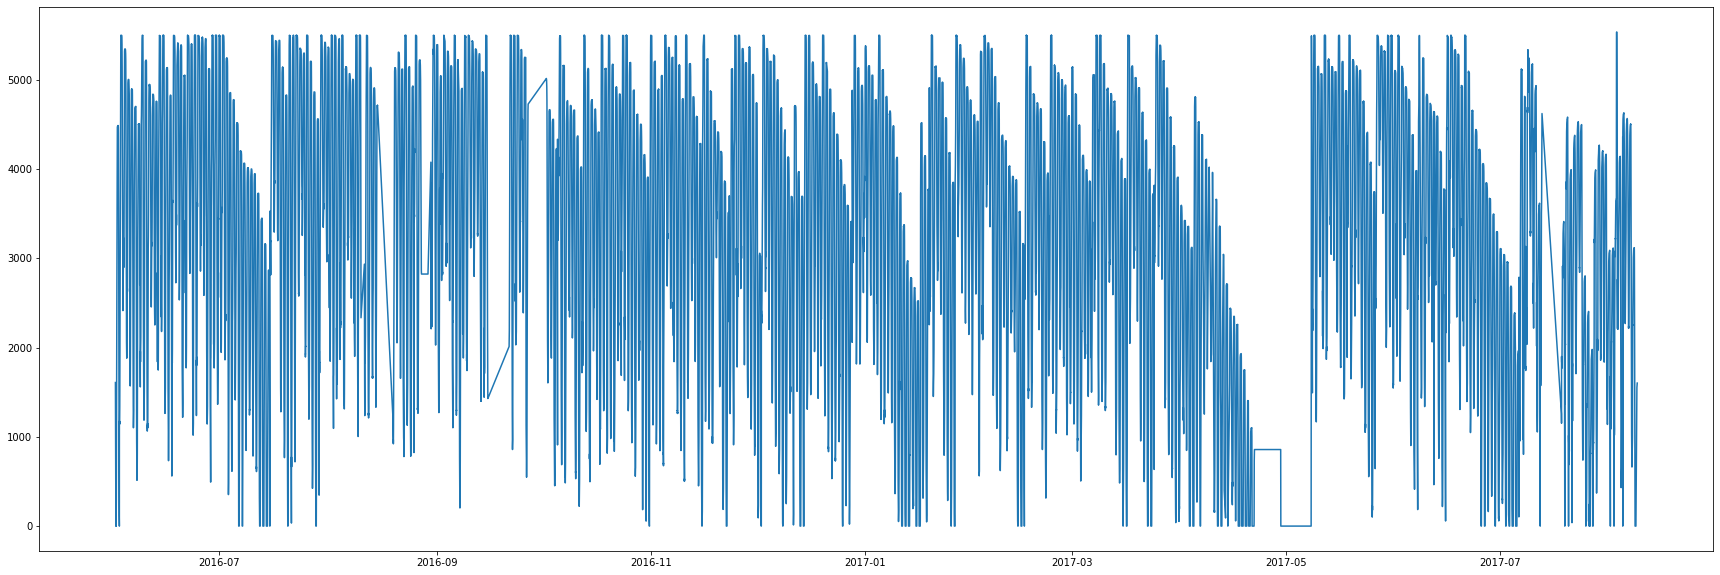

In [10]:
plt.plot(new_data)

#### It is possible to visualize that there are time bands without data, which may not exist in the dataset or it was time bands with NA (Open) values.

#### Straight lines on the X axis show time ranges that are not valid in the dataset (like the most visible in 2017-05).

#### Now we need to remove all datetime values without the pattern of 15 min range period.

#### This means that, we must remove all dates from the dataset that do not have data in the standard 15 minutes, periodically throughout the day.
#### Performing simple calculations, as the day has 24h -> 24x60 = 1440 minutes per day, which divided by 15 -> 1440/15 = 96 records for each day.
#### Therefore, to consider valid days in our dataset, we will remove all days that do not contain valid data for the 96 periods analyzed by the sensor.

In [11]:
## prepared_data = new_data.copy()
## prepared_data = prepared_data.groupby([new_data.index.date]).count()
#prepared_data = new_data[ (new_data.groupby([new_data.index.date]).count() == 96) ]
#prepared_data = new_data.groupby([new_data.index.date]).count()

## prepared_data = prepared_data[(prepared_data['spots_available'] >= 94)]
## prepared_data.index = pd.to_datetime(prepared_data.index)


#prepared_data = new_data.index.filter(lambda x : len(x)!=96)
#prepared_data.head(50)


## final_data = new_data.copy()
## final_data = final_data[ (final_data.index.to_series().dt.date ]
## final_data.head(50)


In [12]:
# Create a copy of the dataframe
## date_counts = new_data.copy()

# Add new column with date only (only date needs 96 values)
## date_counts.index = date_counts.index.strftime('%d/%m/%Y')
## date_counts['spots_available'] = date_counts.index.value_counts()


#prepared_data_final = new_data.copy()
#prepared_data_final = prepared_data_final.merge(date_counts['spots_available'].to_frame(), left_on='verification_datetime', right_index=True)
#prepared_data_final = prepared_data[prepared_data.date_counts == 96]

## prepared_data.head(45)

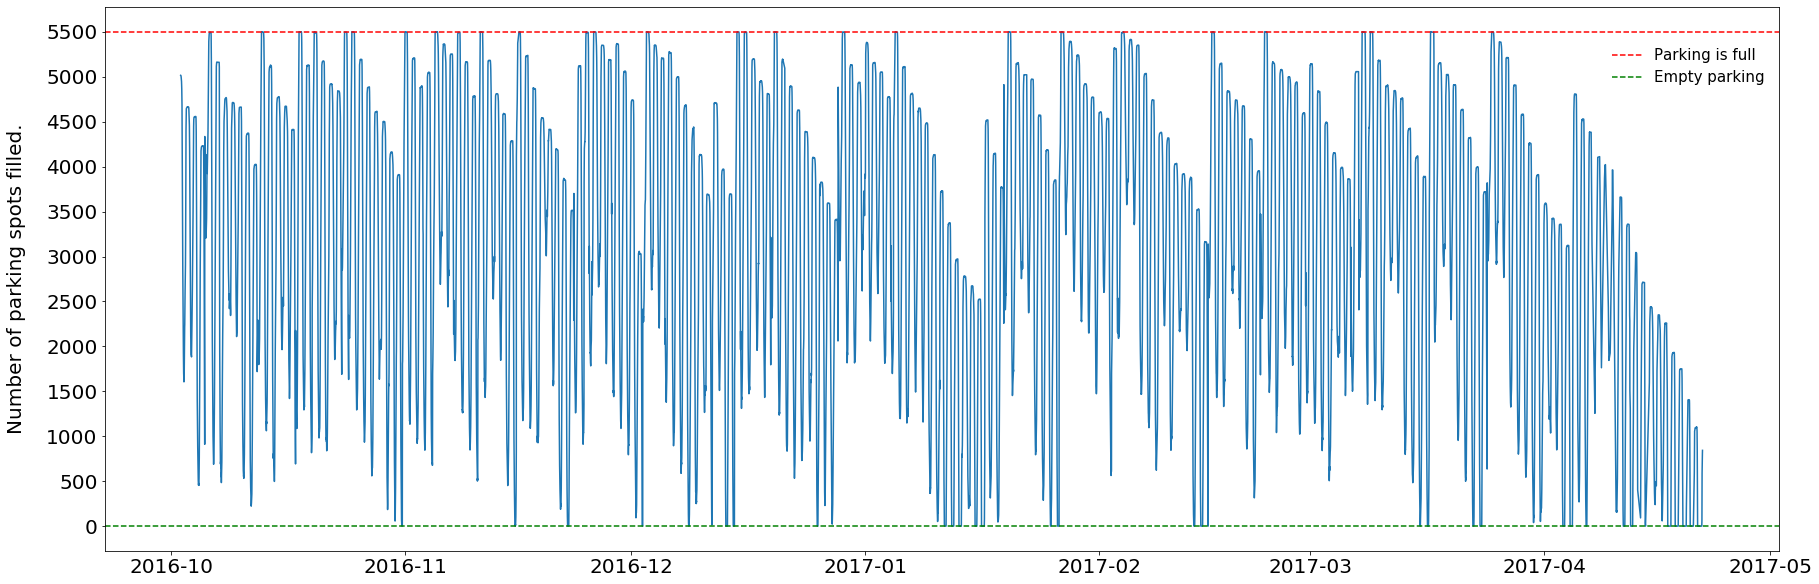

In [13]:
# Filter the dataset from the range of time with the minimun noise
prepared_data = new_data.copy()

prepared_data = prepared_data[(prepared_data.index.to_series().dt.date >= pd.to_datetime('10-01-2016').date()) & 
                         (prepared_data.index.to_series().dt.date <= pd.to_datetime('04-21-2017').date()) ]

#prepared_data = prepared_data[(prepared_data.index.to_series().dt.day >= 3) | (prepared_data.index.to_series().dt.month != 6)]

plt.tick_params(axis='both', which='major',  labelsize=20)
plt.ylabel('Number of parking spots filled.', labelpad=20,  fontsize=20)

#plt.plot(y=5500, color='r', linestyle='dashed')

plt.plot(prepared_data)

plt.locator_params(axis='y', nbins=21)
plt.axhline(y=5500, color='r', linestyle='--', label="Parking is full")
plt.axhline(y=0, color='g', linestyle='--', label="Empty parking")
plt.legend(loc='upper right', frameon=False, bbox_to_anchor=(1, 0.95), prop={'size': 15})

#### Now we need to save the prepared data in a new dataset, which can be used in ML Algorithms

In [14]:
print("Saving prepared dataset...")
outputCSV = '../datasets/prepared/parking-prepared.csv';
prepared_data.to_csv(outputCSV, index=True)
print("Done!")

Saving prepared dataset...
Done!
